<a href="https://colab.research.google.com/github/Yasminebenhamadi/NMA/blob/main/CN/W1D2_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Linear regression with MLE

**Week 1, Day 2: Model Fitting**

**By Neuromatch Academy**

**Content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil  with help from Byron Galbraith

**Content reviewers**: Lina Teichmann, Madineh Sarvestani, Patrick Mineault, Ella Batty, Michael Waskom

---
# Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [ ]:
# @title Plotting Functions
def plot_density_image(x, y, theta, sigma=1, ax=None):
  """ Plots probability distribution of y given x, theta, and sigma

  Args:

    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta (float): Slope parameter
    sigma (float): standard deviation of Gaussian noise

  """

  # plot the probability density of p(y|x,theta)
  if ax is None:
    fig, ax = plt.subplots()

  xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
  ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
  xx = np.linspace(xmin, xmax, 50)
  yy = np.linspace(ymin, ymax, 50)

  surface = np.zeros((len(yy), len(xx)))
  for i, x_i in enumerate(xx):
    surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

  ax.set(xlabel='x', ylabel='y')

  return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
            cmap=plt.get_cmap('Wistia'),
            extent=[xmin, xmax, ymin, ymax])

---
# Section 1: Maximum Likelihood Estimation (MLE)


## Section 1.1: Gaussian noise

In [ ]:
# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact(mu=widgets.FloatSlider(0.0, min=-2.0, max=2.0),
                  sigma=widgets.FloatSlider(1.0, min=0.5, max=2.0))
def plot_normal_dist(mu=0, sigma=1):

  # Generate pdf & samples from normal distribution with mu/sigma
  rv = stats.norm(mu, sigma)
  x = np.linspace(-5, 5, 100)
  y = rv.pdf(x)
  samples = rv.rvs(1000)

  # Plot
  fig, ax = plt.subplots()
  ax.hist(samples, 20, density=True, color='g', histtype='stepfilled', alpha=0.8,
          label='histogram')
  ax.plot(x, y, color='orange', linewidth=3, label='pdf')
  ax.vlines(mu, 0, rv.pdf(mu), color='y', linewidth=3, label='$\mu$')
  ax.vlines([mu-sigma, mu+sigma], 0, rv.pdf([mu-sigma, mu+sigma]), colors='red',
            color='b', linewidth=3, label='$\sigma$')
  ax.set(xlabel='x', ylabel='probability density', xlim=[-5, 5], ylim=[0, 1.0])
  ax.legend()

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

In [ ]:
# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence

np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

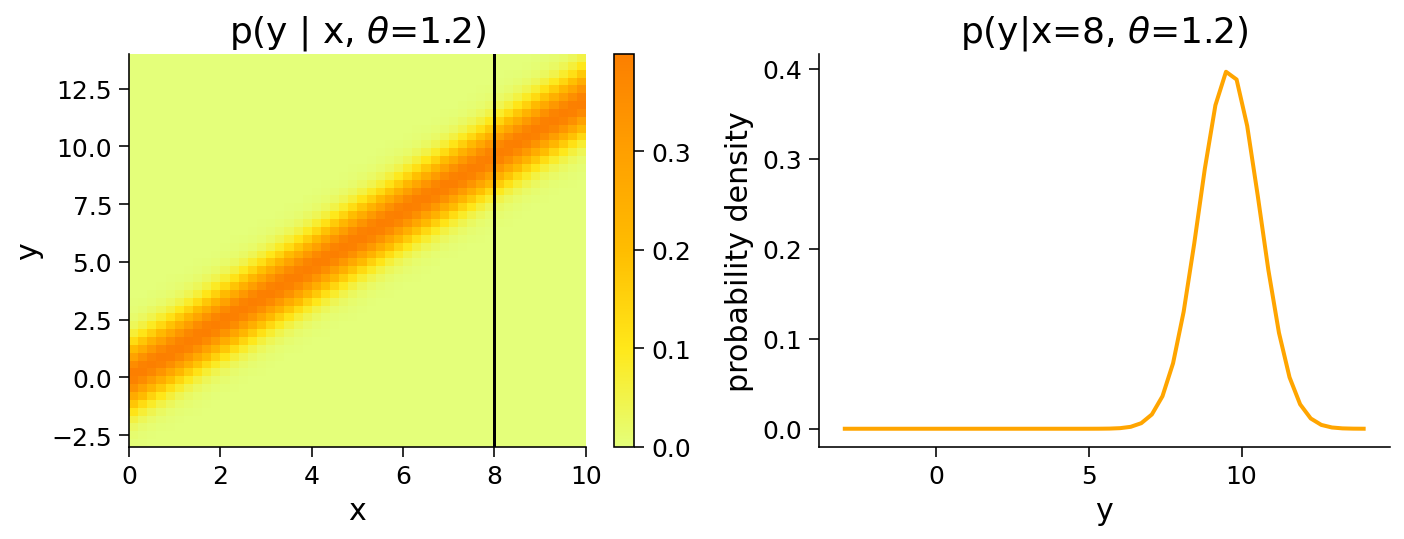

In [ ]:
# @markdown Execute this cell to visualize p(y|x, theta=1.2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(theta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\theta$=1.2)',
    xlabel='y',
    ylabel='probability density');

In [ ]:
def likelihood(theta_hat, x, y):
  """The likelihood function for a linear model with noise sampled from a
    Gaussian distribution with zero mean and unit variance.

  Args:
    theta_hat (float): An estimate of the slope parameter.
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray: the likelihood values for the theta_hat estimate
  """
  sigma = 1
  ##############################################################################
  ## TODO for students: implement the likelihood function
  ##############################################################################

  # Compute Gaussian likelihood
  factor = 1/np.sqrt(2*np.pi*(sigma**2))
  pdf = factor*np.exp((-(y-theta_hat*x)**2)/(2*(sigma**2)))

  return pdf


print(likelihood(1.0, x[1], y[1]))

0.11344443599846923


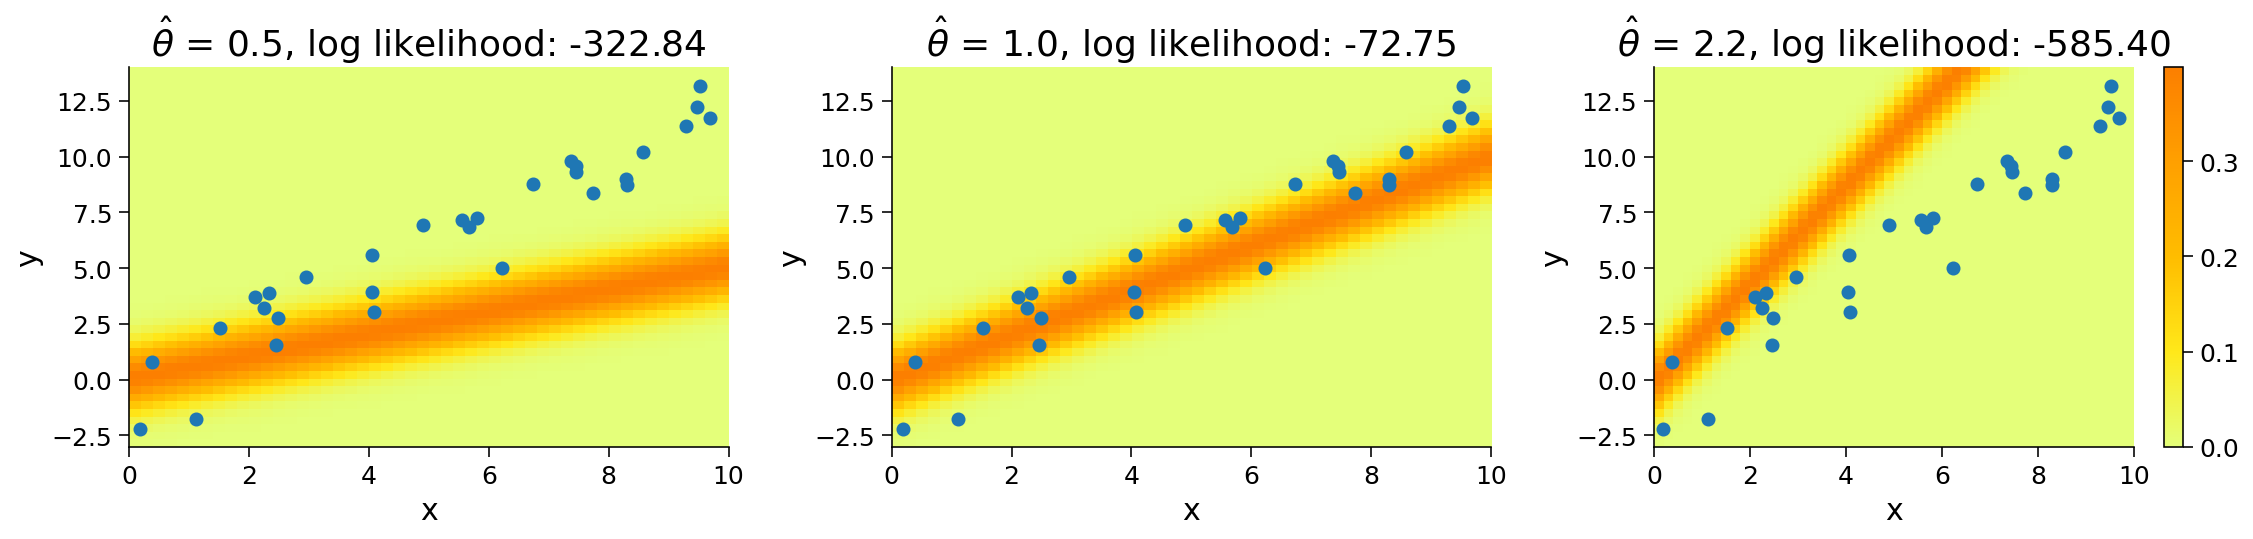

In [ ]:
# @markdown Execute this cell to visualize different distribution densities
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax in zip(theta_hats, axes):
  ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
  im = plot_density_image(x, y, theta_hat, ax=ax)
  ax.scatter(x, y)
  ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax);

In [ ]:
# Compute theta_hat_MLE
theta_hat_mle = (x @ y) / (x @ x)

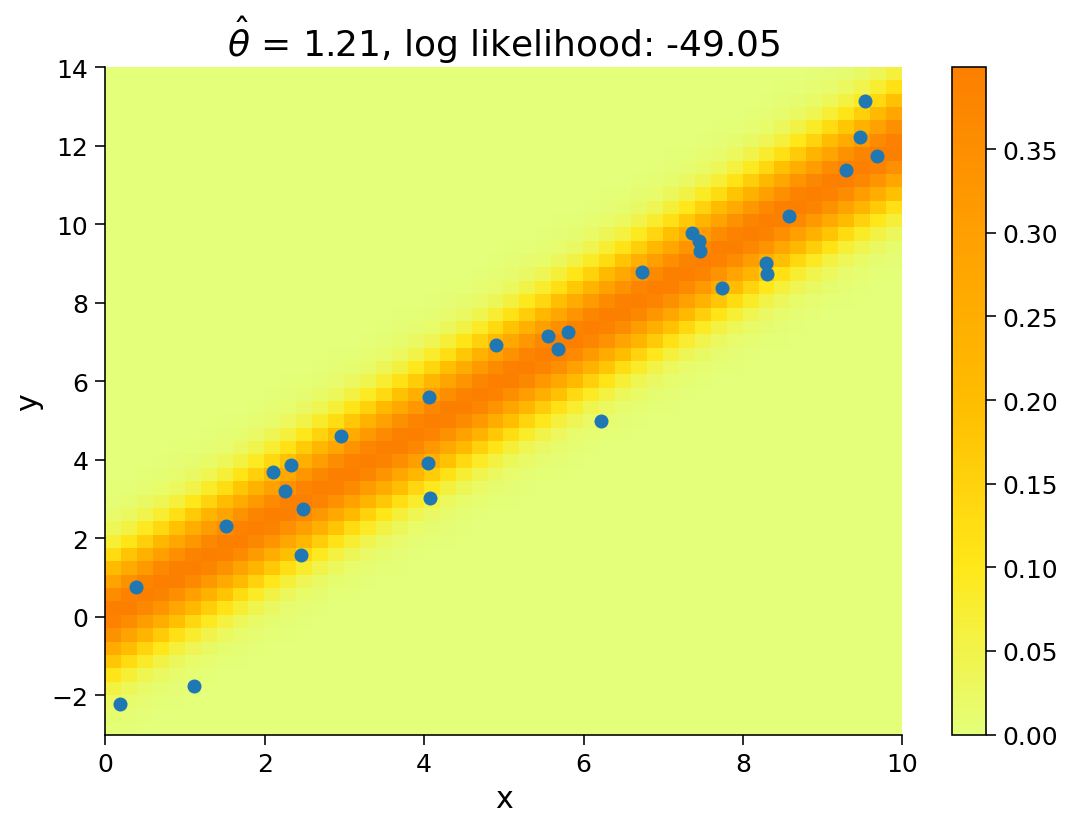

In [ ]:
#@title
#@markdown Execute this cell to visualize density with theta_hat_mle

# Plot the resulting distribution density
fig, ax = plt.subplots()
ll = np.sum(np.log(likelihood(theta_hat_mle, x, y))) # log likelihood
im = plot_density_image(x, y, theta_hat_mle, ax=ax)
plt.colorbar(im, ax=ax);
ax.scatter(x, y)
ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat_mle:.2f}, log likelihood: {ll:.2f}');

---
# Bonus

We can also see $\mathrm{p}(\mathrm{y} | \mathrm{x}, \theta)$ as a function of $x$. This is the stimulus likelihood function, and it is useful in case we want to decode the input $x$ from observed responses $y$. This is what is relevant from the point of view of a neuron that does not have access to the outside world and tries to infer what's out there from the responses of other neurons!



